In [51]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

In [21]:
lats = np.random.uniform(-90,90,size = 1500)
lngs = np.random.uniform(-180,180,size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs
coordinates = list(lat_lngs)

In [22]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

78.47224592678717 -53.02695231644249
14.07394336344872 179.03544467019435
-33.58181566514811 -24.628665434811154
43.41383570856394 -25.544326599515188
-22.471698404000307 -26.252166794926268
79.49380629563197 148.82230408659586
63.7898173553308 -112.78421980128631
86.05538065181275 123.38853170349984
-79.59007099927877 -173.26146509388718
-2.4407031971229287 -170.39469414547287
-89.54646199575164 117.18785003490353
-78.21822173922345 4.5555894520898335
-60.66228832663322 48.792938989289354
-81.82192703873825 -138.83201179266467
-84.86392929432697 -11.950502115188726
21.975033144773008 -95.71975636841772
53.04140348143784 176.47406274859924
-66.211938105574 -16.616876874768536
-1.5988801724029003 -169.28552745374088
59.016360050108176 22.379632554072572
-74.78227373357905 94.80845721941716
80.39316086332562 120.19787368291225
7.351078332757183 -103.29502638893005
-81.20364414468092 -82.20801729166769
26.44111345669532 -0.2954169344292268
-64.86444150780221 -71.71741237912893
-13.0583851

-33.18628402294381 33.84126720281918
89.7693865152201 -169.71342807055177
-69.34129443262685 7.607747135249582
-78.88883530664498 -53.1606060505365
-37.21318773275367 10.571873170130033
-72.47838043234853 -65.30322767662523
-4.330270851788313 108.0661155252601
-46.885602789922416 -17.997487238622256
-4.031197114098319 140.36761593611357
-45.54177680211462 157.74280511626728
-17.261245023418923 -175.30795139725225
10.415249022197983 83.9181056607627
-40.048209620091576 -59.548465463078344
-84.0405447791141 -18.440740321378257
-60.90793576407094 51.046221315496894
-23.692169223968335 115.3502633209689
43.51558946369957 -122.13773992627796
66.11467268527252 156.48450499723356
-89.71079080660557 -60.06884227943719
-22.223469744017308 135.1411178898229
49.99342161374511 22.429569619879004
64.96450136676825 132.8857384334848
47.18157659480113 112.25110543606263
69.01013481623596 73.62095502334634
41.548696384597804 82.79958256506336
-10.513752361508239 -44.74835801067644
61.49386553885955 11

In [23]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)        

595

In [24]:
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d39686a781a93b95e99fac1569f508a


In [25]:
import time
from datetime import datetime


In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")
# Create counters.
record_count = 1
set_count = 1
for i,city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i%50==0 and i>=50):
        set_count+=1
        record_count = 1
        time.sleep(10)
        
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record{record_count} of Set{set_count} | {city}")
    # Add 1 to the record count.
    record_count+=1
# Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({
            "City":city.title(),
            "Lat":city_lat,
            "Lng": city_lng,                 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date                 
        })
    except:
        print("City not found.Skipping....")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


    
                                          
                                          

Beginning Data Retrieval   
---------------------------
Processing Record1 of Set1 | upernavik
Processing Record2 of Set1 | butaritari
Processing Record3 of Set1 | sao joao da barra
Processing Record4 of Set1 | praia da vitoria
Processing Record5 of Set1 | caravelas
Processing Record6 of Set1 | chokurdakh
Processing Record7 of Set1 | yellowknife
Processing Record8 of Set1 | tiksi
Processing Record9 of Set1 | vaini
Processing Record10 of Set1 | saleaula
City not found.Skipping....
Processing Record11 of Set1 | albany
Processing Record12 of Set1 | hermanus
Processing Record13 of Set1 | east london
Processing Record14 of Set1 | rikitea
Processing Record15 of Set1 | tamiahua
Processing Record16 of Set1 | beringovskiy
Processing Record17 of Set1 | cape town
Processing Record18 of Set1 | kardla
Processing Record19 of Set1 | busselton
Processing Record20 of Set1 | saskylakh
Processing Record21 of Set1 | acapulco
Processing Record22 of Set1 | ushuaia
Processing Record23 of Set1 | adrar
Process

Processing Record46 of Set4 | palmer
Processing Record47 of Set4 | lakes entrance
Processing Record48 of Set4 | tamandare
Processing Record49 of Set4 | tarko-sale
Processing Record50 of Set4 | port blair
Processing Record1 of Set5 | fortuna
Processing Record2 of Set5 | port lincoln
Processing Record3 of Set5 | linjiang
Processing Record4 of Set5 | pangkalanbuun
Processing Record5 of Set5 | itaituba
Processing Record6 of Set5 | mayor pablo lagerenza
Processing Record7 of Set5 | hervey bay
Processing Record8 of Set5 | skjervoy
Processing Record9 of Set5 | quesnel
Processing Record10 of Set5 | hithadhoo
Processing Record11 of Set5 | toktogul
Processing Record12 of Set5 | sinnar
Processing Record13 of Set5 | kavieng
Processing Record14 of Set5 | utiroa
City not found.Skipping....
Processing Record15 of Set5 | nelson bay
Processing Record16 of Set5 | hamilton
Processing Record17 of Set5 | aginskoye
Processing Record18 of Set5 | bombay
Processing Record19 of Set5 | maceio
Processing Record20

Processing Record43 of Set8 | nishihara
Processing Record44 of Set8 | narasannapeta
Processing Record45 of Set8 | verkhoyansk
Processing Record46 of Set8 | abilene
Processing Record47 of Set8 | thenzawl
Processing Record48 of Set8 | rocha
Processing Record49 of Set8 | kavaratti
Processing Record50 of Set8 | bergen
Processing Record1 of Set9 | kalmunai
Processing Record2 of Set9 | beloha
Processing Record3 of Set9 | ulaanbaatar
Processing Record4 of Set9 | omutinskoye
City not found.Skipping....
Processing Record5 of Set9 | buala
Processing Record6 of Set9 | labuhan
Processing Record7 of Set9 | novorozhdestvenskaya
Processing Record8 of Set9 | urucara
Processing Record9 of Set9 | kiama
Processing Record10 of Set9 | fare
Processing Record11 of Set9 | saldanha
Processing Record12 of Set9 | manggar
Processing Record13 of Set9 | vanimo
Processing Record14 of Set9 | neiafu
Processing Record15 of Set9 | trincomalee
Processing Record16 of Set9 | necochea
Processing Record17 of Set9 | bend
Proc

Processing Record41 of Set12 | praxedis guerrero
Processing Record42 of Set12 | staraya toropa
Processing Record43 of Set12 | muleba
Processing Record44 of Set12 | samarinda
Processing Record45 of Set12 | george
-----------------------------
Data Retrieval Complete      
-----------------------------


In [33]:
len(city_data)

544

In [34]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,26.98,68,68,5.59,GL,2022-04-26 16:01:27
1,Butaritari,3.0707,172.7902,80.73,83,58,17.87,KI,2022-04-26 16:01:27
2,Sao Joao Da Barra,-21.6403,-41.0511,79.32,75,18,8.68,BR,2022-04-26 16:01:27
3,Praia Da Vitoria,38.7333,-27.0667,65.75,78,74,18.16,PT,2022-04-26 16:01:28
4,Caravelas,-17.7125,-39.2481,81.88,66,36,4.12,BR,2022-04-26 16:01:28
5,Chokurdakh,70.6333,147.9167,-4.13,100,100,4.90,RU,2022-04-26 16:01:28
6,Yellowknife,62.4560,-114.3525,35.56,69,88,13.00,CA,2022-04-26 16:00:59
7,Tiksi,71.6872,128.8694,-5.51,100,51,4.09,RU,2022-04-26 16:01:29
8,Vaini,-21.2000,-175.2000,76.69,70,38,19.82,TO,2022-04-26 16:01:29
9,Albany,42.6001,-73.9662,53.26,79,100,1.16,US,2022-04-26 15:58:45


In [35]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_col_order]


In [36]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-04-26 16:01:27,72.7868,-56.1549,26.98,68,68,5.59
1,Butaritari,KI,2022-04-26 16:01:27,3.0707,172.7902,80.73,83,58,17.87
2,Sao Joao Da Barra,BR,2022-04-26 16:01:27,-21.6403,-41.0511,79.32,75,18,8.68
3,Praia Da Vitoria,PT,2022-04-26 16:01:28,38.7333,-27.0667,65.75,78,74,18.16
4,Caravelas,BR,2022-04-26 16:01:28,-17.7125,-39.2481,81.88,66,36,4.12
5,Chokurdakh,RU,2022-04-26 16:01:28,70.6333,147.9167,-4.13,100,100,4.90
6,Yellowknife,CA,2022-04-26 16:00:59,62.4560,-114.3525,35.56,69,88,13.00
7,Tiksi,RU,2022-04-26 16:01:29,71.6872,128.8694,-5.51,100,51,4.09
8,Vaini,TO,2022-04-26 16:01:29,-21.2000,-175.2000,76.69,70,38,19.82
9,Albany,US,2022-04-26 15:58:45,42.6001,-73.9662,53.26,79,100,1.16


In [38]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file,index_label = "City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

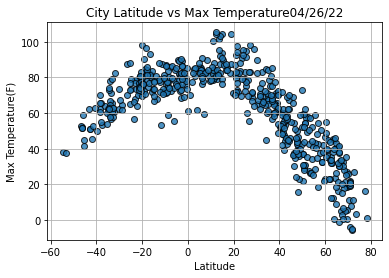

In [52]:
import time
plt.scatter(lats,max_temps,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Max Temperature"+ time.strftime('%x'))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()


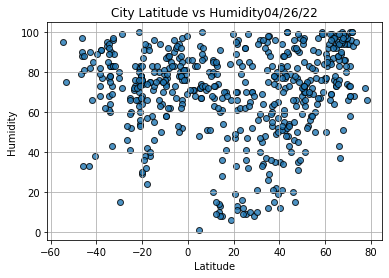

In [53]:
import time
plt.scatter(lats,humidity,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Humidity"+ time.strftime('%x'))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

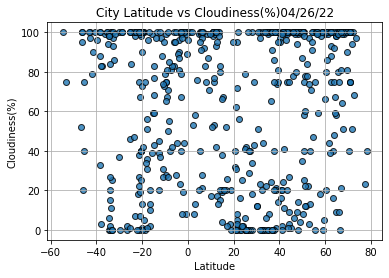

In [57]:
import time
plt.scatter(lats,cloudiness,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Cloudiness(%)"+ time.strftime('%x'))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

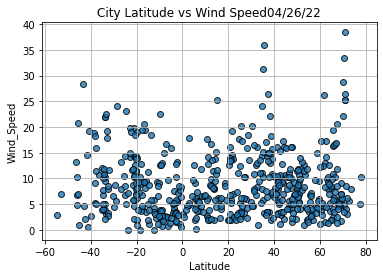

In [58]:
import time
plt.scatter(lats,wind_speed,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Wind Speed"+ time.strftime('%x'))
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()